# 2D Channel Flow

Now that the building blocks of solving the Navier-Stokes equations has been established, we will tackle tat now for channel flow.

Recall that the momentum equation is:

$$\frac{\partial \vec{v}}{\partial t}+(\vec{v}\cdot\nabla)\vec{v}=-\frac{1}{\rho}\nabla p + \nu \nabla^2\vec{v}$$

In two dimensions, we will have three unknowns: $u, v$, and $p$. We will need three equations. The momentum equations in each dimension will serve to give us the velocities, and the Poisson equation for pressure, imposing the continuity constraint, will be the third to obtain the pressure. In two dimensions, our three equations are:

$$\frac{\partial u}{\partial t}+u\frac{\partial u}{\partial x}+v\frac{\partial u}{\partial y} = -\frac{1}{\rho}\frac{\partial p}{\partial x}+\nu \left(\frac{\partial^2 u}{\partial x^2}+\frac{\partial^2 u}{\partial y^2} \right)$$

$$\frac{\partial v}{\partial t}+u\frac{\partial v}{\partial x}+v\frac{\partial v}{\partial y} = -\frac{1}{\rho}\frac{\partial p}{\partial y}+\nu\left(\frac{\partial^2 v}{\partial x^2}+\frac{\partial^2 v}{\partial y^2}\right)$$

$$\frac{\partial^2 p}{\partial x^2}+\frac{\partial^2 p}{\partial y^2} = -\rho\left(\frac{\partial u}{\partial x}\frac{\partial u}{\partial x}+2\frac{\partial u}{\partial y}\frac{\partial v}{\partial x}+\frac{\partial v}{\partial y}\frac{\partial v}{\partial y} \right)$$

Recall that in the continuous domain, the gradient of the velocity is zero. In the numerical domain, there is no guarantee that the divergence is zero. We want to force the current step divergence to be zero, while maintaining that the previous step divergence may not be zero, and including that in the pressure Poisson equation. That is why the divergence term appears in the discretized form, but not in the continuous form.

The discretized version of the equations are:

__x-momentum__
$$\begin{split}
& \frac{u_{i,j}^{n+1}-u_{i,j}^{n}}{\Delta t}+u_{i,j}^{n}\frac{u_{i,j}^{n}-u_{i-1,j}^{n}}{\Delta x}+v_{i,j}^{n}\frac{u_{i,j}^{n}-u_{i,j-1}^{n}}{\Delta y} = \\ 
& \qquad -\frac{1}{\rho}\frac{p_{i+1,j}^{n}-p_{i-1,j}^{n}}{2\Delta x}+\nu\left(\frac{u_{i+1,j}^{n}-2u_{i,j}^{n}+u_{i-1,j}^{n}}{\Delta x^2}+\frac{u_{i,j+1}^{n}-2u_{i,j}^{n}+u_{i,j-1}^{n}}{\Delta y^2}\right)
\end{split}$$

__y-momentum__
$$\begin{split}
&\frac{v_{i,j}^{n+1}-v_{i,j}^{n}}{\Delta t}+u_{i,j}^{n}\frac{v_{i,j}^{n}-v_{i-1,j}^{n}}{\Delta x}+v_{i,j}^{n}\frac{v_{i,j}^{n}-v_{i,j-1}^{n}}{\Delta y} = \\
& \qquad -\frac{1}{\rho}\frac{p_{i,j+1}^{n}-p_{i,j-1}^{n}}{2\Delta y}
+\nu\left(\frac{v_{i+1,j}^{n}-2v_{i,j}^{n}+v_{i-1,j}^{n}}{\Delta x^2}+\frac{v_{i,j+1}^{n}-2v_{i,j}^{n}+v_{i,j-1}^{n}}{\Delta y^2}\right)
\end{split}$$

__pressure with non-zero divergence term__
$$\begin{split}
& \frac{p_{i+1,j}^{n}-2p_{i,j}^{n}+p_{i-1,j}^{n}}{\Delta x^2}+\frac{p_{i,j+1}^{n}-2p_{i,j}^{n}+p_{i,j-1}^{n}}{\Delta y^2} = \\
& \qquad \rho \left[ \frac{1}{\Delta t}\left(\frac{u_{i+1,j}-u_{i-1,j}}{2\Delta x}+\frac{v_{i,j+1}-v_{i,j-1}}{2\Delta y}\right) -\frac{u_{i+1,j}-u_{i-1,j}}{2\Delta x}\frac{u_{i+1,j}-u_{i-1,j}}{2\Delta x} - 2\frac{u_{i,j+1}-u_{i,j-1}}{2\Delta y}\frac{v_{i+1,j}-v_{i-1,j}}{2\Delta x} - \frac{v_{i,j+1}-v_{i,j-1}}{2\Delta y}\frac{v_{i,j+1}-v_{i,j-1}}{2\Delta y}\right]
\end{split}$$

See that center-differences are used in all of the spatial derivatives for the Poisson pressure equation.

Transposing the above equations for $u$, $v$, and $p$ yields:

$$\begin{split}
u_{i,j}^{n+1} = u_{i,j}^{n} & - u_{i,j}^{n} \frac{\Delta t}{\Delta x} \left(u_{i,j}^{n}-u_{i-1,j}^{n}\right) - v_{i,j}^{n} \frac{\Delta t}{\Delta y} \left(u_{i,j}^{n}-u_{i,j-1}^{n}\right) \\
& - \frac{\Delta t}{\rho 2\Delta x} \left(p_{i+1,j}^{n}-p_{i-1,j}^{n}\right) \\
& + \nu \left(\frac{\Delta t}{\Delta x^2} \left(u_{i+1,j}^{n}-2u_{i,j}^{n}+u_{i-1,j}^{n}\right) + \frac{\Delta t}{\Delta y^2} \left(u_{i,j+1}^{n}-2u_{i,j}^{n}+u_{i,j-1}^{n}\right)\right)
\end{split}$$

$$\begin{split}
v_{i,j}^{n+1} = v_{i,j}^{n} & - u_{i,j}^{n} \frac{\Delta t}{\Delta x} \left(v_{i,j}^{n}-v_{i-1,j}^{n}\right) - v_{i,j}^{n} \frac{\Delta t}{\Delta y} \left(v_{i,j}^{n}-v_{i,j-1}^{n})\right) \\
& - \frac{\Delta t}{\rho 2\Delta y} \left(p_{i,j+1}^{n}-p_{i,j-1}^{n}\right) \\
& + \nu \left(\frac{\Delta t}{\Delta x^2} \left(v_{i+1,j}^{n}-2v_{i,j}^{n}+v_{i-1,j}^{n}\right) + \frac{\Delta t}{\Delta y^2} \left(v_{i,j+1}^{n}-2v_{i,j}^{n}+v_{i,j-1}^{n}\right)\right)
\end{split}$$

$$\begin{split}
p_{i,j}^{n} = & \frac{\left(p_{i+1,j}^{n}+p_{i-1,j}^{n}\right) \Delta y^2 + \left(p_{i,j+1}^{n}+p_{i,j-1}^{n}\right) \Delta x^2}{2\left(\Delta x^2+\Delta y^2\right)} \\
& -\frac{\rho\Delta x^2\Delta y^2}{2\left(\Delta x^2+\Delta y^2\right)} \\
& \times \left[\frac{1}{\Delta t}\left(\frac{u_{i+1,j}-u_{i-1,j}}{2\Delta x}+\frac{v_{i,j+1}-v_{i,j-1}}{2\Delta y}\right)-\frac{u_{i+1,j}-u_{i-1,j}}{2\Delta x}\frac{u_{i+1,j}-u_{i-1,j}}{2\Delta x} -2\frac{u_{i,j+1}-u_{i,j-1}}{2\Delta y}\frac{v_{i+1,j}-v_{i-1,j}}{2\Delta x}-\frac{v_{i,j+1}-v_{i,j-1}}{2\Delta y}\frac{v_{i,j+1}-v_{i,j-1}}{2\Delta y}\right]
\end{split}$$

Cavity flow is a stagnation area, in a pit of sorts, with an external flow over the top, consisting of a shear layer. This will be modeled by having an x-velocity at the top of the cavity. Everywhere else, the velocity will be zero on the boundaries. There is no y-pressure gradient at the bottom of the cavity, and there is no x-pressure gradient at the sides of the cavity. The pressure at the top of the cavity must be atmospheric ($p=0$). These boundary conditions are summarized as:

$u=1$ at $y=2$ (the top)

$u, v=0$ on the other boundaries

$\frac{\partial p}{\partial y}=0$ at $y=0$

$p=0$ at $y=2$

$\frac{\partial p}{\partial x} = 0$ at $x = 0, 2$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [113]:
def initialize(nt=500):
    nx = 41
    ny = 41
    nit = 50
    c = 1
    Lx = 2
    Ly = 2
    dx = Lx / (nx - 1)
    dy = Ly / (ny -1)
    x = np.linspace(0, Lx, nx)
    y = np.linspace(0, Ly, nx)
    rho = 1.
    nu = 0.1
    dt = 0.001
    u = np.zeros((ny, nx))
    v = np.zeros((ny, nx))
    p = np.zeros((ny, nx))
    b = np.zeros((ny, nx))
    u, v, p = cavity_flow(nt,nit,u,v,dt,dx,dy,nx,ny,p,rho,nu)
    return u, v, p, x, y

In [44]:
# The purpose of this function is to compute the quantity in the square brackets 
# of the Poisson pressure equation 
def build_up_b(b, rho, dt, u, v, dx, dy):
#     b[1:-1,1:-1] = (rho*(1/dt*
#                          ((u[1:-1,2:]-u[1:-1,:-2])/(2*dx) + 
#                           (v[2:,1:-1]-v[:-2,1:-1])/(2*dy)) -
#                          ((u[1:-1,2:]-u[1:-1,:-2])/(2*dx))**2 -
#                          ((v[2:,1:-1]-v[:-2,1:-1])/(2*dy))**2 -
#                          2*(u[2:,1:-1]-u[:-2,1:-1])/(2*dy) *
#                            (v[1:-1,2:]-v[1:-1,:-2])/(2*dx)))
    b[1:-1, 1:-1] = (rho * (1 / dt * 
                    ((u[1:-1, 2:] - u[1:-1, 0:-2]) / 
                     (2 * dx) + (v[2:, 1:-1] - v[0:-2, 1:-1]) / (2 * dy)) -
                    ((u[1:-1, 2:] - u[1:-1, 0:-2]) / (2 * dx))**2 -
                      2 * ((u[2:, 1:-1] - u[0:-2, 1:-1]) / (2 * dy) *
                           (v[1:-1, 2:] - v[1:-1, 0:-2]) / (2 * dx))-
                          ((v[2:, 1:-1] - v[0:-2, 1:-1]) / (2 * dy))**2))
    return b

In [50]:
def pressure_poisson(p, nit, dx, dy, b, rho):
    pn = np.empty_like(p)
    pn = np.copy(p)
    
    for q in range(nit):
        pn = np.copy(p)
        p[1:-1,1:-1] = (((pn[1:-1,2:]+pn[1:-1,:-2])*dy**2 + 
                         (pn[2:,1:-1]+pn[:-2,1:-1])*dx**2) /
                         (2*(dx**2+dy**2)) - 
                         dx**2*dy**2/(2*(dx**2+dy**2)) *
                         b[1:-1,1:-1])
        # Boundary conditions
        p[0,:] = p[1,:]     # dp/dy=0 @ y=0
        p[-1,:] = 0         # p=0 @ y = 2
        p[:,0] = p[:,1]     # dp/dx=0 @ x=0
        p[:,-1] = p[:,-2]   # dp/dx=0 @ x=2
        
#         p[1:-1, 1:-1] = (((pn[1:-1, 2:] + pn[1:-1, 0:-2]) * dy**2 + 
#                           (pn[2:, 1:-1] + pn[0:-2, 1:-1]) * dx**2) /
#                           (2 * (dx**2 + dy**2)) -
#                           dx**2 * dy**2 / (2 * (dx**2 + dy**2)) * 
#                           b[1:-1,1:-1])

#         p[:, -1] = p[:, -2] # dp/dx = 0 at x = 2
#         p[0, :] = p[1, :]   # dp/dy = 0 at y = 0
#         p[:, 0] = p[:, 1]   # dp/dx = 0 at x = 0
#         p[-1, :] = 0        # p = 0 at y = 2
    return p

In [122]:
def cavity_flow(nt, nit, u, v, dt, dx, dy, nx, ny, p, rho, nu):
    un = np.empty_like(u)
    vn = np.empty_like(v)
    b = np.zeros((ny, nx))
    
    for n in range(nt):
        un = np.copy(u)
        vn = np.copy(v)
        b = build_up_b(b, rho, dt, u, v, dx, dy)
        p = pressure_poisson(p, nit, dx, dy, b, rho)
        
        u[1:-1,1:-1] = (un[1:-1,1:-1]-un[1:-1,1:-1]*dt/dx*(un[1:-1,1:-1]-un[1:-1,2:]) -
                        vn[1:-1,1:-1]*dt/dy*(un[1:-1,1:-1]-un[:-2,1:-1]) -
                        dt/(rho*2*dx)*(p[1:-1,2:]-p[1:-1,:-2]) +
                        nu*(dt/dx**2*(un[1:-1,2:]-2*un[1:-1,1:-1]+un[1:-1,:-2]) +
                          dt/dy**2*(un[2:,1:-1]-2*un[1:-1,1:-1]+u[:-2,1:-1])))
        
        v[1:-1,1:-1] = (vn[1:-1,1:-1]-un[1:-1,1:-1]*dt/dx*(vn[1:-1,1:-1]-vn[1:-1,:-2]) - 
                        vn[1:-1,1:-1]*dt/dy*(vn[1:-1,1:-1]-vn[:-2,1:-1]) - 
                        dt/(rho*2*dy)*(p[2:,1:-1]-p[:-2,1:-1]) + 
                        nu*(dt/dx**2*(vn[1:-1,2:]-2*vn[1:-1,1:-1]+vn[1:-1,:-2]) +
                           dt/dy**2*(vn[2:,1:-1]-2*vn[1:-1,1:-1]+vn[:-2,1:-1])))
        # Boundary conditions
        u[-1,:] = 3
        u[:,0] = 0
        u[:,-1] = 0
        u[0,:] = 0
        v[:,0] = 0
        v[:,-1] = 0
        v[0,:] = 0
        
    return u, v, p

In [95]:
def plot_cavity(u, v, p, x, y):
    X, Y = np.meshgrid(x, y)
    fig = plt.figure(figsize=(11,7), dpi=300)
    # Plot pressure field as contour
    plt.contourf(X, Y, p, alpha=0.5, cmap=cm.viridis)
    plt.colorbar()
    # Plot pressure field outlines
    plt.contour(X, Y, p, cmap=cm.viridis)
    # Plot velocity field
    plt.streamplot(X[::2,::2], Y[::2,::2], u[::2,::2], v[::2,::2])
    plt.quiver(X[::2,::2], Y[::2,::2], u[::2,::2], v[::2,::2])
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.show()

In [123]:
u, v, p, x, y = initialize(nt=300)

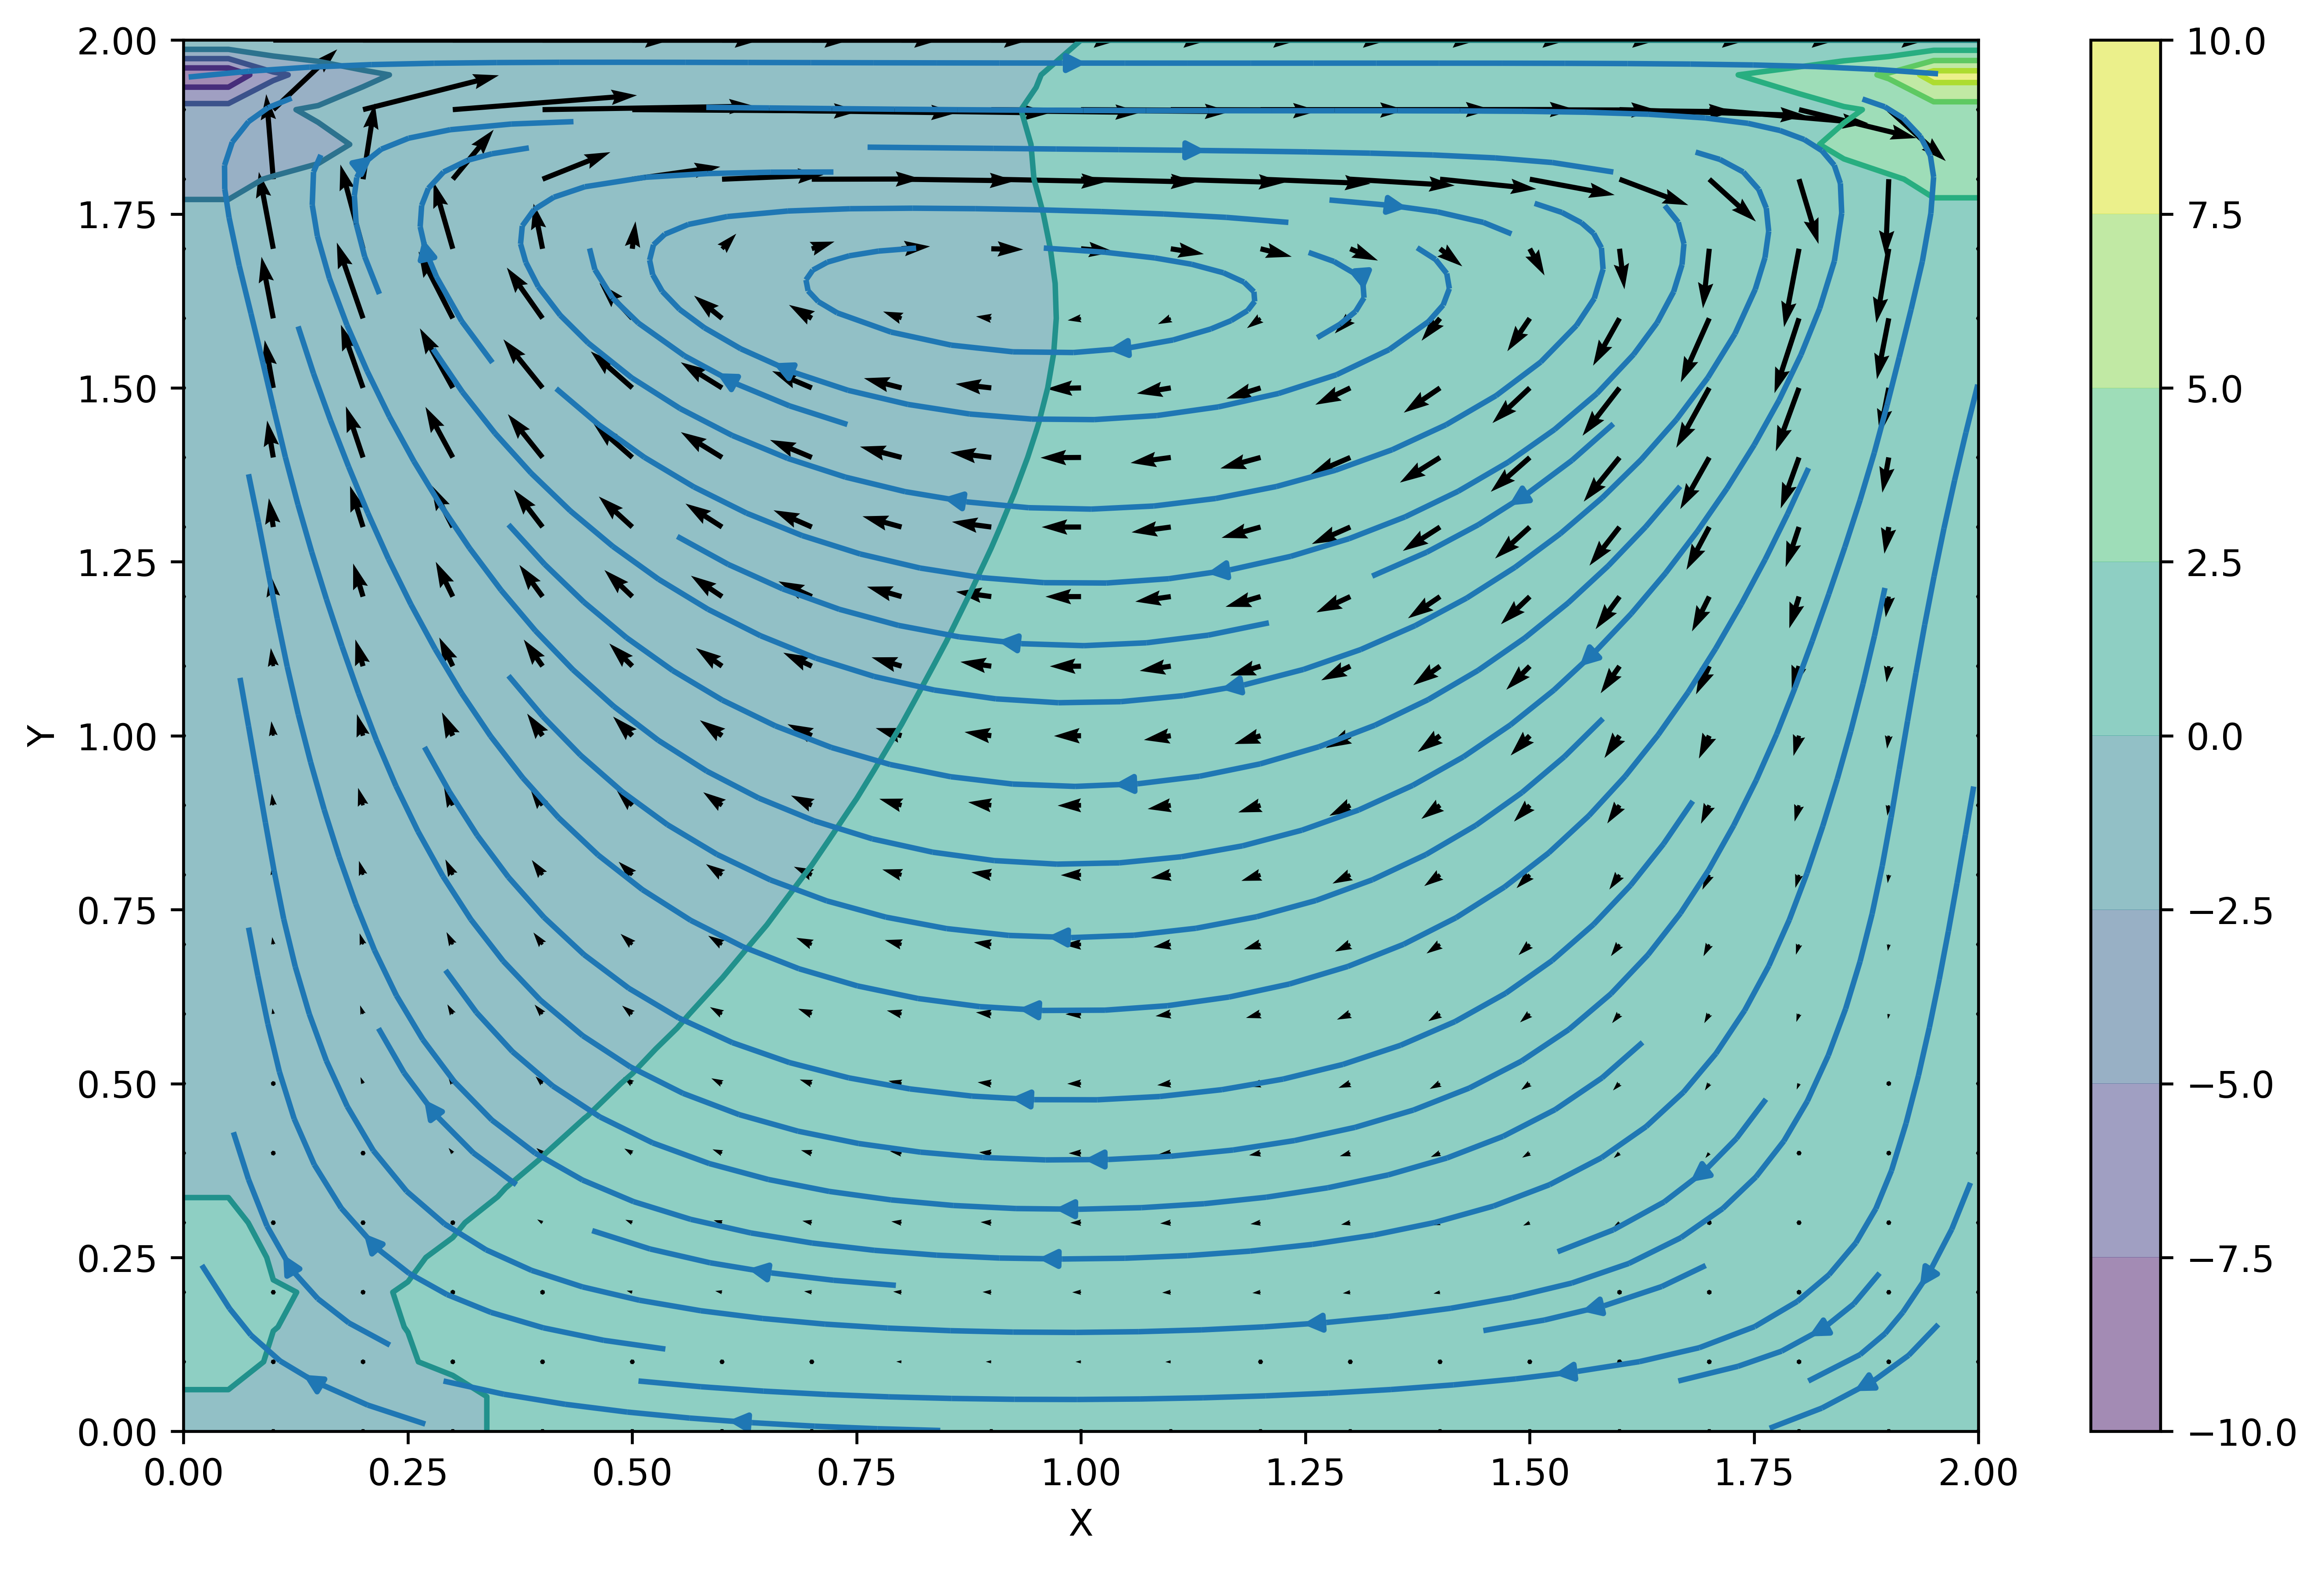

In [124]:
plot_cavity(u,v,p,x,y)